## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max.columns', None)

In [45]:
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
# house = pd.read_csv('house_data.csv')
house = pd.read_csv('https://bit.ly/2Ww3f6sPropertiesDs')
print(house.shape)
house.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# check dataset shape
house.shape

(21613, 21)

In [5]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [6]:
house = house.drop(columns = ['id', 'date'])
print(house.shape)
house.head()

(21613, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# check for duplicates
house.duplicated().sum()

5

In [8]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
print(house.shape)
house.head()

(21608, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [10]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

18

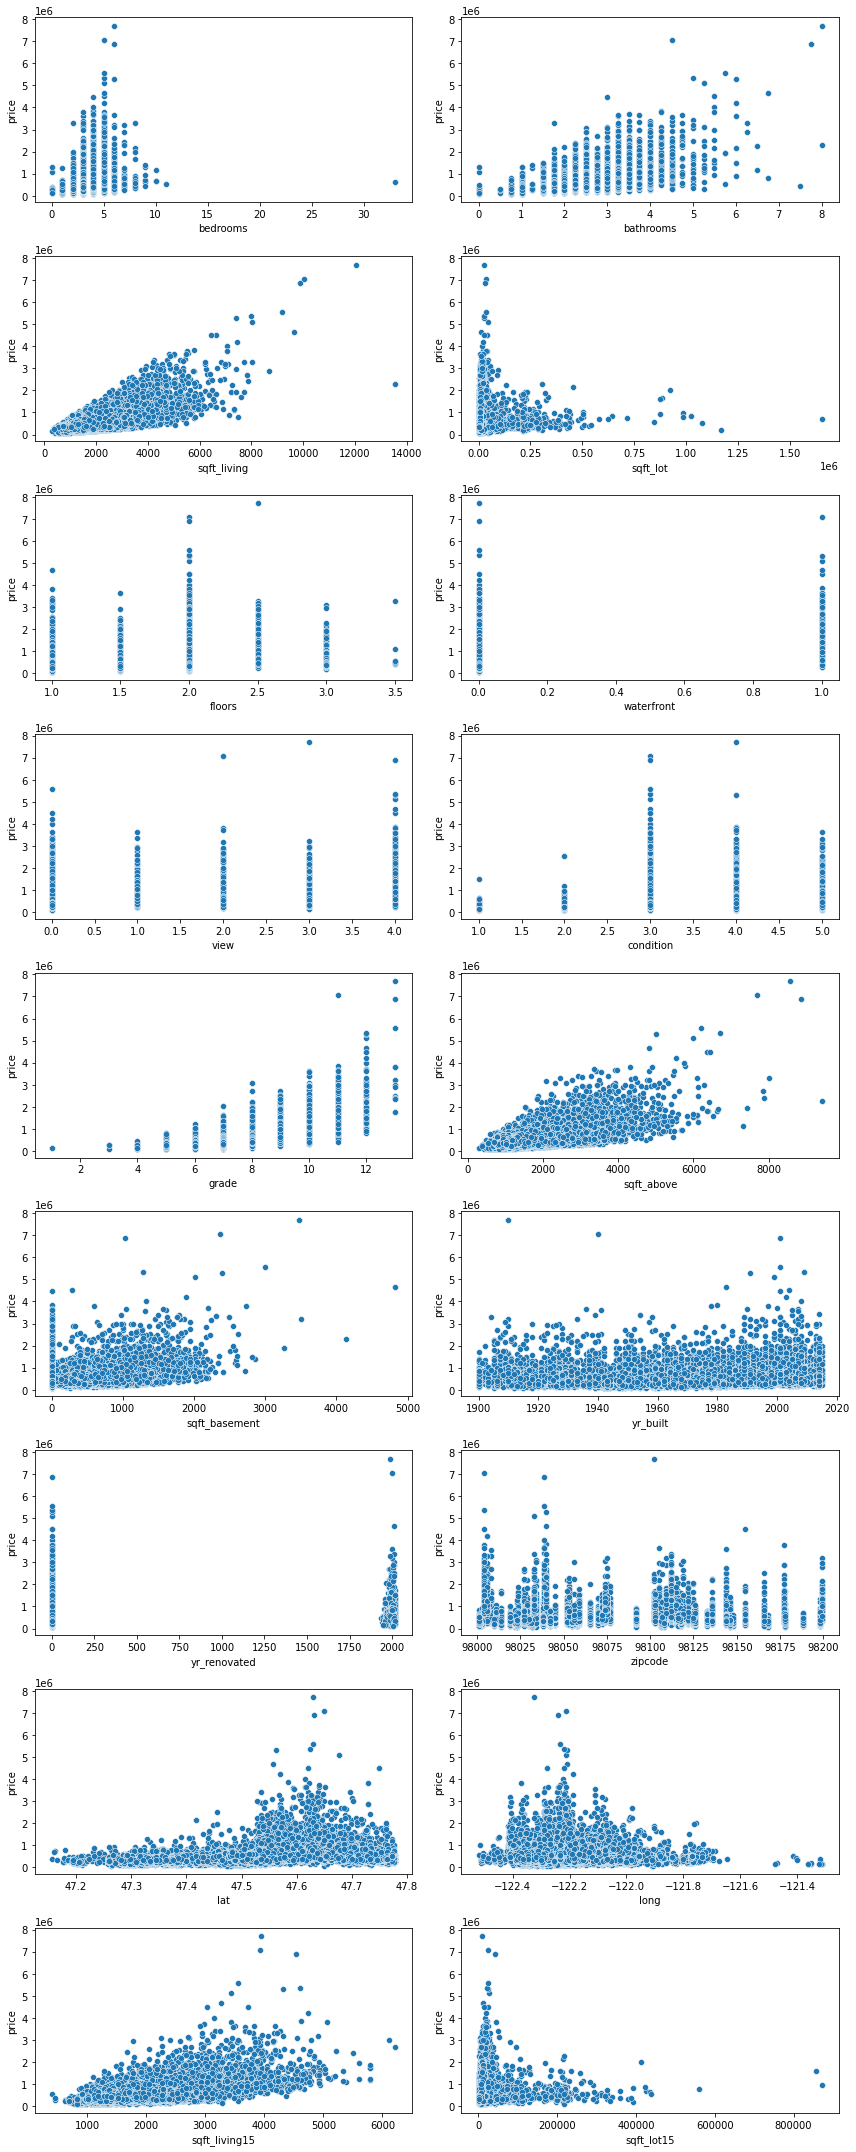

In [11]:
# creating scatterplots to observe the relationship between price and the variables
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

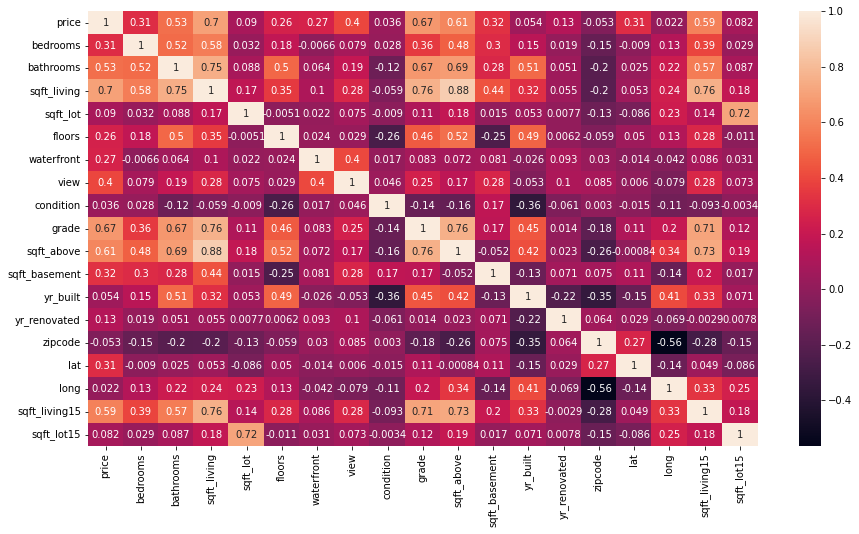

In [12]:
corr = house.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [13]:
corr['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667541
sqft_above       0.605559
sqft_living15    0.585378
bathrooms        0.525146
view             0.397409
sqft_basement    0.323839
bedrooms         0.308326
lat              0.307002
waterfront       0.266371
floors           0.256893
yr_renovated     0.126489
sqft_lot         0.089652
sqft_lot15       0.082435
yr_built         0.054062
zipcode          0.053179
condition        0.036345
long             0.021587
Name: price, dtype: float64

What have you noticed? What will you do next?

In [14]:
price_corr = corr['price'].abs().sort_values(ascending=False)
drop_cols = price_corr[price_corr < 0.5].index
drop_cols

Index(['view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors',
       'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'zipcode',
       'condition', 'long'],
      dtype='object')

The following features are not highly correlated with the price, we need to drop them <br>
<b><i>
'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'zipcode', 'condition', 'long'

In [15]:
house = house.drop(columns=drop_cols)
print(house.shape)
house.head()

(21608, 6)


,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


### 3.2 Checking for outliers

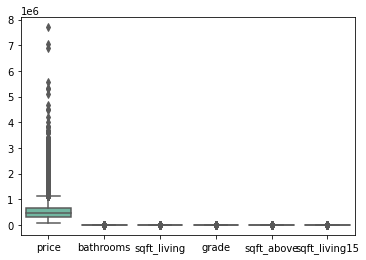

In [16]:
# create a boxplot to visualize the outliers
sns.boxplot(data=house, palette="Set2")

What observations can you make? What actions are you going to take next?

**No outliers noted**

### 3.3 Checking multicollinearity

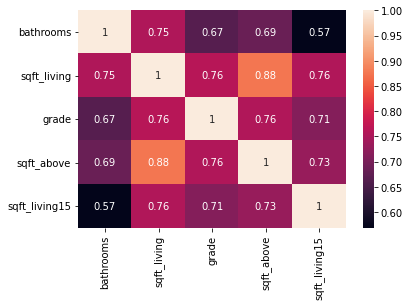

In [20]:
# create a heatmap of the correlations
# YOUR CODE HERE
features = house.drop('price',axis=1)
corr = features.corr()
sns.heatmap(data=corr,annot=True)

In [21]:
# check VIF scores
# YOUR CODE HERE
# Let's use these correlations to compute the VIF score for each variable.
# we create a new dataframe with the inverse of the matrix above.

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
bathrooms,2.448301,-1.484780,-0.570754,-0.098755,0.210203
sqft_living,-1.484780,6.072213,-0.492637,-3.114829,-1.117609
grade,-0.570754,-0.492637,2.948865,-0.812323,-0.812001
sqft_above,-0.098755,-3.114829,-0.812323,4.786440,-0.511214
sqft_living15,0.210203,-1.117609,-0.812001,-0.511214,2.679225


What have you noticed? What actions are you going to take next regarding this?

**sqft_living has a value more than 5, let's see how the VIF scores improve if we remove it from our dataset**

In [22]:
new_features = features.drop(columns=['sqft_living'])
corr = new_features.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bathrooms,grade,sqft_above,sqft_living15
bathrooms,2.085242,-0.691214,-0.860394,-0.063075
grade,-0.691214,2.908898,-1.065029,-0.902673
sqft_above,-0.860394,-1.065029,3.188643,-1.084507
sqft_living15,-0.063075,-0.902673,-1.084507,2.473526


**All scores dropped, but the sqft_living15's in particular did quite a bit, indicating that sqft_living and sqft_living15 were colinear.**

## <font color='#2F4F4F'>4. Data Modeling</font>

In [23]:
# split into features (X) and label (Y)
# YOUR CODE HERE
X = new_features.values
y = house['price'].values

In [25]:
# split into 80-20 train and test sets
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('\nX_train: ', X_train.shape, '\nX_test: ',X_test.shape, '\ny_train: ',y_train.shape, '\ny_test: ',y_test.shape)


X_train:  (17286, 4) 
X_test:  (4322, 4) 
y_train:  (17286,) 
y_test:  (4322,)


In [29]:
# fit regressor to data and make predictions
# YOUR CODE HERE

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
# evaluate RMSE and r-squared scores
# YOUR CODE HERE
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print('RMSE: ', rmse, '\n R2 Score',r2)

RMSE:  253569.9558094622 
 R2 Score 0.47073680354198544


What conclusions have you drawn?

<b>The R2 score of 0.47 indicates a poor level of correlation between the features and the target (price)

### 4.1 Test for normality and homoscedasticity


Min:  -749579.9825583841 
Max:  4801236.194114138 
Mean:  -5305.426440333236


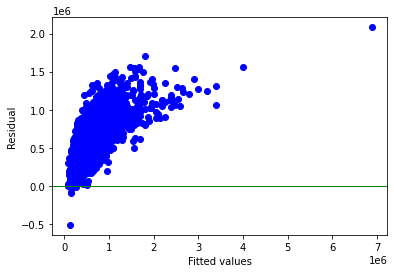

In [38]:
# create a dataframe of residuals
# YOUR CODE HERE
residuals = np.subtract(y_test,y_pred)
print('\nMin: ',residuals.min(), '\nMax: ',residuals.max(), '\nMean: ', residuals.mean())
# plotting our residuals
# YOUR CODE HERE

plt.scatter(y_test, y_pred, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='green', linewidth=1)
plt.show()

What is your interpretation of the residual plot?

**The linear regression model is not fit for the data since the residuals have formed a pattern and are not centred around the x-axis**

In [40]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
# YOUR CODE HERE

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("test_result: ", test_result, "\nCritical value:", critical_value)

test_result:  0.9737772904825389 
Critical value: 4362.977557429707


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [41]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [46]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 251668.37310448353

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 286490.3185850179

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 300115.072172327

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 323857.6290937488

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 333001.0503078029

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 338593.5029680511

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 362407.89720921323

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 369999.0500805921

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 394922.9854067007

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 233153.7457981428

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 230294.6152927417

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score: 232

In [47]:
print("Ada Boosting R-squared Score:", metrics.r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(y_test, xgbr_predict))

Ada Boosting R-squared Score: -0.28381051441505045
Gradient Boosting R-squared Score: 0.4854072717176532
XG Boosting R-squared Score: 0.5549381871781701


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.